In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Polarization Curves - 01/31/2024

Taking the most stable values of measured current and voltage after running the cell over a fixed resistance for a "long" amount of time

Measured the potential across the battery

In [4]:
runs_to_resistance_1_31 = {'Run5':510, 'Run6':100, 'Run7':51, 'Run8':22, 'Run9':10}
voltage_cell_1_31 = pd.DataFrame(data={'Run':runs_to_resistance_1_31.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_1_31.values(),
                                       'Voltage (V)':[1.391,1.333,1.303,1.1666,0.963]})
voltage_cell_1_31['Current (Amps)'] = voltage_cell_1_31['Voltage (V)'] / voltage_cell_1_31['Resistance (Ohms)']
voltage_cell_1_31['Current (mA)'] = voltage_cell_1_31['Current (Amps)'] * 1000
current_cell_1_31 = pd.DataFrame(data={'Run':runs_to_resistance_1_31.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_1_31.values(),
                                       'Current (Amps)':[0.0027,0.0136,0.0251,0.05339,0.09302]})
current_cell_1_31['Current (mA)'] = current_cell_1_31['Current (Amps)'] * 1000
current_cell_1_31['Voltage (V)'] = current_cell_1_31['Current (Amps)'] * current_cell_1_31['Resistance (Ohms)']

Current Cell
    Run  Resistance (Ohms)  Current (Amps)  Current (mA)  Voltage (V)
0  Run5                510         0.00270          2.70      1.37700
1  Run6                100         0.01360         13.60      1.36000
2  Run7                 51         0.02510         25.10      1.28010
3  Run8                 22         0.05339         53.39      1.17458
4  Run9                 10         0.09302         93.02      0.93020
Voltage Cell
    Run  Resistance (Ohms)  Voltage (V)  Current (Amps)  Current (mA)
0  Run5                510       1.3910        0.002727      2.727451
1  Run6                100       1.3330        0.013330     13.330000
2  Run7                 51       1.3030        0.025549     25.549020
3  Run8                 22       1.1666        0.053027     53.027273
4  Run9                 10       0.9630        0.096300     96.300000


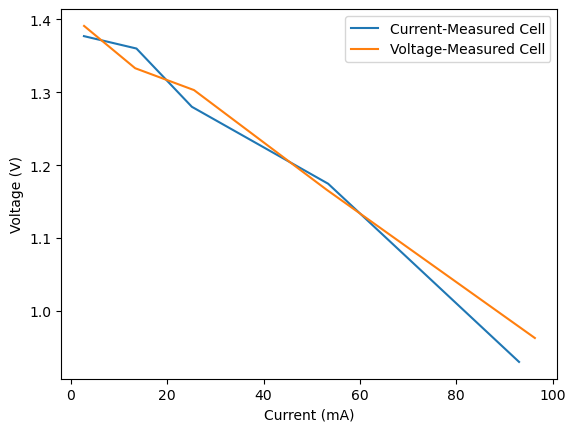

In [12]:
print('Current Cell')
print(current_cell_1_31)
print('Voltage Cell')
print(voltage_cell_1_31)

sns.lineplot(data=current_cell_1_31, x='Current (mA)', y='Voltage (V)', label='Current-Measured Cell')
sns.lineplot(data=voltage_cell_1_31, x='Current (mA)', y='Voltage (V)', label='Voltage-Measured Cell');

In [10]:
# Regression to find the internal resistance, assuming this is the Ohmic losses region (since it is so linear!)
from sklearn.linear_model import LinearRegression

model_1_31_voltage = LinearRegression()
model_1_31_voltage.fit(voltage_cell_1_31[['Current (Amps)']], voltage_cell_1_31[['Voltage (V)']])
predictions_1_31_voltage = model_1_31_voltage.predict(voltage_cell_1_31[['Current (Amps)']])
slope_1_31_voltage, intercept_1_31_voltage = model_1_31_voltage.coef_[0][0], model_1_31_voltage.intercept_[0]
Rint_1_31_voltage = -slope_1_31_voltage


model_1_31_current = LinearRegression()
model_1_31_current.fit(current_cell_1_31[['Current (Amps)']], current_cell_1_31[['Voltage (V)']])
predictions_1_31_current = model_1_31_current.predict(current_cell_1_31[['Current (Amps)']])
slope_1_31_current, intercept_1_31_current = model_1_31_current.coef_[0][0], model_1_31_current.intercept_[0]
Rint_1_31_current = -slope_1_31_current

print('Internal Resistance Voltage Cell:',np.round(Rint_1_31_voltage,3),'Ohms \nInternal Resistance Current Cell:',np.round(Rint_1_31_current,3),'Ohms')

Internal Resistance Voltage Cell: 4.554 Ohms 
Internal Resistance Current Cell: 5.002 Ohms


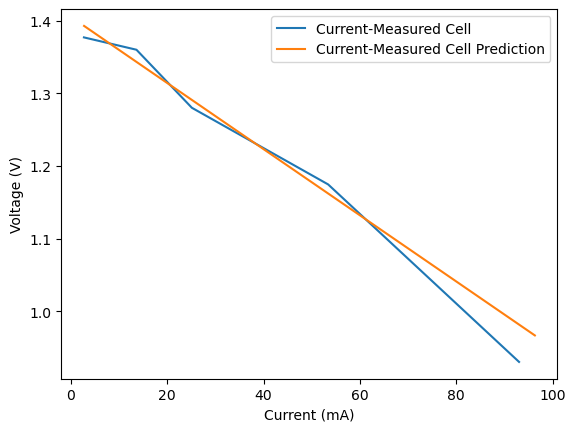

In [11]:
sns.lineplot(data=current_cell_1_31, x='Current (mA)', y='Voltage (V)', label='Current-Measured Cell')
plt.plot(voltage_cell_1_31[['Current (mA)']], predictions_1_31_voltage, label='Current-Measured Cell Prediction')
plt.legend();

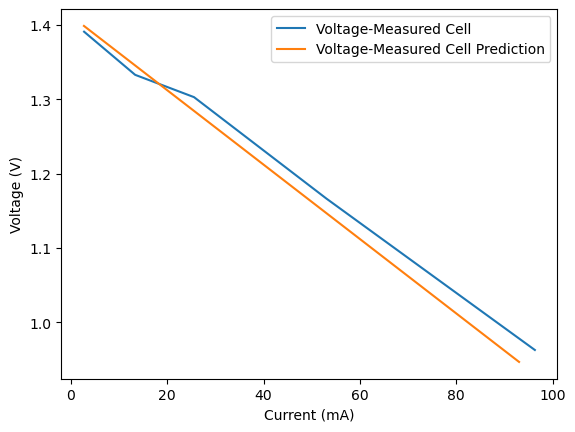

In [12]:
sns.lineplot(data=voltage_cell_1_31, x='Current (mA)', y='Voltage (V)', label='Voltage-Measured Cell')
plt.plot(current_cell_1_31[['Current (mA)']], predictions_1_31_current, label='Voltage-Measured Cell Prediction')
plt.legend();

# Polarization Curves - 02/07/2024

Taking the most stable values of measured current and voltage after running the cell over a fixed resistance for a "long" amount of time

Measured the potential across the battery

In [13]:
runs_to_resistance_2_17 = {'Run1':1500, 'Run2':680, 'Run3':560, 'Run4':470, 'Run5':330, 'Run6':220, 'Run7':150, 'Run8':120, 'Run9':51, 'Run10':33, 'Run11':22}
voltage_cell_2_17 = pd.DataFrame(data={'Run':runs_to_resistance_2_17.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_17.values(),
                                       'Voltage (V)':[(1.477+1.462)/2, 1.427, (1.417+1.403+1.412+1.407)/4, (1.388+1.393+1.398+1.403)/4, (1.398+1.383+1.388+1.393)/4,(1.364+1.354+1.373+1.359+1.364)/5, (1.354+1.344+1.339)/3, (1.329+1.334+1.339)/3, 1.29, (1.227+1.231+1.236+1.241)/4, (1.192+1.197+1.207+1.212)/4]})
voltage_cell_2_17['Current (Amps)'] = voltage_cell_2_17['Voltage (V)'] / voltage_cell_2_17['Resistance (Ohms)']
voltage_cell_2_17['Current (mA)'] = voltage_cell_2_17['Current (Amps)'] * 1000
current_cell_2_17 = pd.DataFrame(data={'Run':runs_to_resistance_2_17.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_17.values(),
                                       'Current (Amps)':[0.001, (0.0021+0.0018)/2, 0.0024, (0.0027+0.0031)/2, (0.0043+0.0040)/2, 0.0062, (0.0087+0.0090)/2, (0.0111+0.0108)/2, 0.0249, (0.0367+0.0370)/2, 0.0535]})
current_cell_2_17['Current (mA)'] = current_cell_2_17['Current (Amps)'] * 1000
current_cell_2_17['Voltage (V)'] = current_cell_2_17['Current (Amps)'] * current_cell_2_17['Resistance (Ohms)']


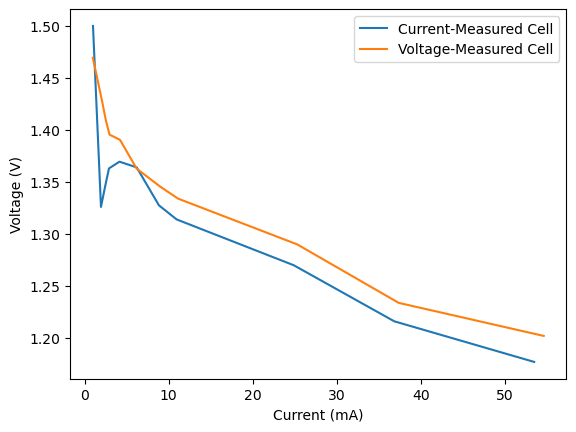

In [14]:
sns.lineplot(data=current_cell_2_17, x='Current (mA)', y='Voltage (V)', label='Current-Measured Cell')

sns.lineplot(data=voltage_cell_2_17, x='Current (mA)', y='Voltage (V)', label='Voltage-Measured Cell');

# Polarization Curves - 02/14/2024

Measured the potential across the resistor - resulted in easier-to-see stabilization of potential (or so we thought, not actually though)

NOTE: we used newer copper tabs here which is why OCV is a little lower

In [15]:
resistances = [1500,510,330,220,150,120,51,33,22]
runs_to_resistance_2_14 = dict(zip(np.array(['Run'+str(i) for i in np.arange(1,len(resistances)+1)]), resistances))
both_cell_2_14 = pd.DataFrame(data={'Run':runs_to_resistance_2_14.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_14.values(),
                                       'Voltage (V)':[1.414, 1.394, 1.379, 1.365, 1.345, 1.311, 1.252, 1.198, 1.120],
                                    'Current (A)':[0.0001, (0.0014+0.0017)/2, 0.0030, 0.0051, 0.0076, 0.0098, 0.0232, 0.0350, 0.0506]})
both_cell_2_14['Current (mA)'] = both_cell_2_14['Current (A)'] * 1000
both_cell_2_14['Calc Current (mA)'] = both_cell_2_14['Voltage (V)'] / both_cell_2_14['Resistance (Ohms)'] * 1000
both_cell_2_14['Calc Voltage (V)'] = both_cell_2_14['Current (A)'] * both_cell_2_14['Resistance (Ohms)']
voltage_only_cell_2_14 = pd.DataFrame(data={'Run':runs_to_resistance_2_14.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_14.values(),
                                       'Voltage (V)':[1.408, 1.385, 1.371, 1.356, 1.337, 1.312, 1.248, 1.199, 1.116]})
voltage_only_cell_2_14['Current (A)'] = voltage_only_cell_2_14['Voltage (V)'] / voltage_only_cell_2_14['Resistance (Ohms)']
voltage_only_cell_2_14['Current (mA)'] = voltage_only_cell_2_14['Current (A)'] * 1000

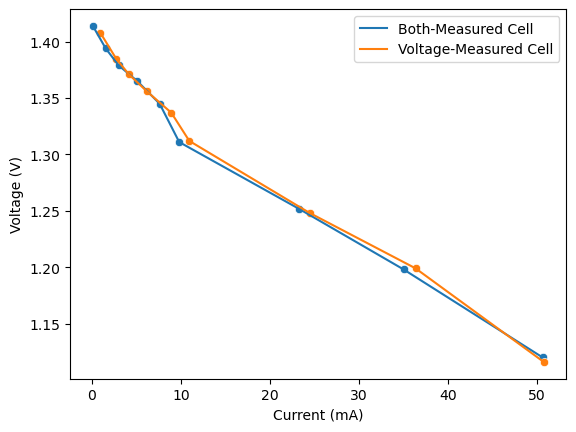

In [16]:
sns.lineplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)', label='Both-Measured Cell')
sns.scatterplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)')
sns.lineplot(data=voltage_only_cell_2_14, x='Current (mA)', y='Voltage (V)', label='Voltage-Measured Cell')
sns.scatterplot(data=voltage_only_cell_2_14, x='Current (mA)', y='Voltage (V)');

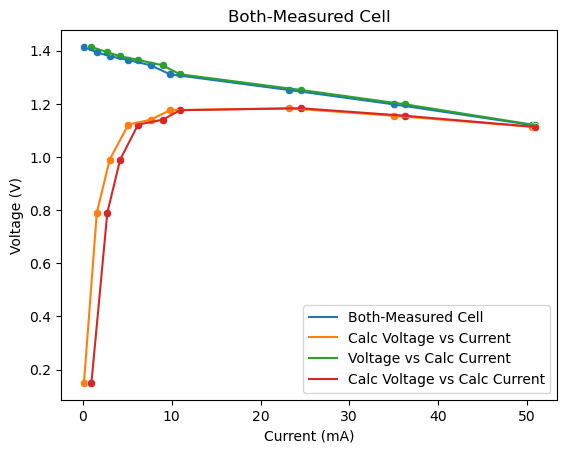

In [17]:
sns.lineplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)', label='Both-Measured Cell')
sns.scatterplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)')
sns.lineplot(data=both_cell_2_14, x='Current (mA)', y='Calc Voltage (V)', label='Calc Voltage vs Current')
sns.scatterplot(data=both_cell_2_14, x='Current (mA)', y='Calc Voltage (V)')
sns.lineplot(data=both_cell_2_14, x='Calc Current (mA)', y='Voltage (V)', label='Voltage vs Calc Current')
sns.scatterplot(data=both_cell_2_14, x='Calc Current (mA)', y='Voltage (V)')
sns.lineplot(data=both_cell_2_14, x='Calc Current (mA)', y='Calc Voltage (V)', label='Calc Voltage vs Calc Current')
sns.scatterplot(data=both_cell_2_14, x='Calc Current (mA)', y='Calc Voltage (V)')
plt.title('Both-Measured Cell');

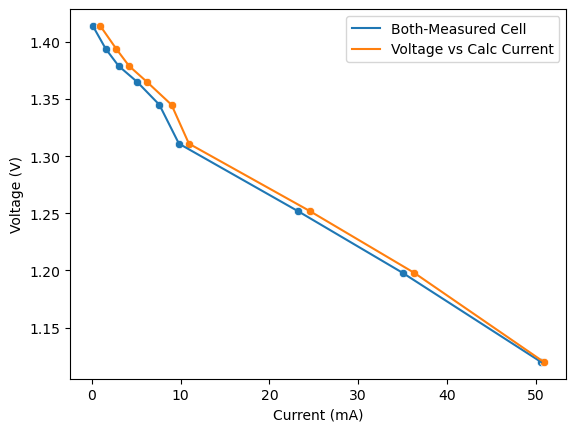

In [18]:
sns.lineplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)', label='Both-Measured Cell')
sns.scatterplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)')
sns.lineplot(data=both_cell_2_14, x='Calc Current (mA)', y='Voltage (V)', label='Voltage vs Calc Current')
sns.scatterplot(data=both_cell_2_14, x='Calc Current (mA)', y='Voltage (V)');

# Polarization Curves - 02/21/2024

same as 2/14 only doing lower resistances

In [19]:
resistances_2_21 = [51,22,10,5.1,1]
runs_to_resistance_2_21 = dict(zip(np.array(['Run'+str(i) for i in np.arange(1,len(resistances_2_21)+1)]), resistances_2_21))
both_cell_2_21 = pd.DataFrame(data={'Run':runs_to_resistance_2_21.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_21.values(),
                                       'Voltage (V)':[1.387,1.235,1.102, 1.001, 0.611],
                                    'Current (A)':[0.0268,0.0561,0.1081,0.1869,0.4857]})
both_cell_2_21['Current (mA)'] = both_cell_2_21['Current (A)'] * 1000
both_cell_2_21['Calc Current (mA)'] = both_cell_2_21['Voltage (V)'] / both_cell_2_21['Resistance (Ohms)'] * 1000
both_cell_2_21['Calc Voltage (V)'] = both_cell_2_21['Current (A)'] * both_cell_2_21['Resistance (Ohms)']
voltage_only_cell_2_21 = pd.DataFrame(data={'Run':runs_to_resistance_2_21.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_21.values(),
                                       'Voltage (V)':[1.362,1.233,1.042,0.850,0.624]})
voltage_only_cell_2_21['Current (A)'] = voltage_only_cell_2_21['Voltage (V)'] / voltage_only_cell_2_21['Resistance (Ohms)']
voltage_only_cell_2_21['Current (mA)'] = voltage_only_cell_2_21['Current (A)'] * 1000

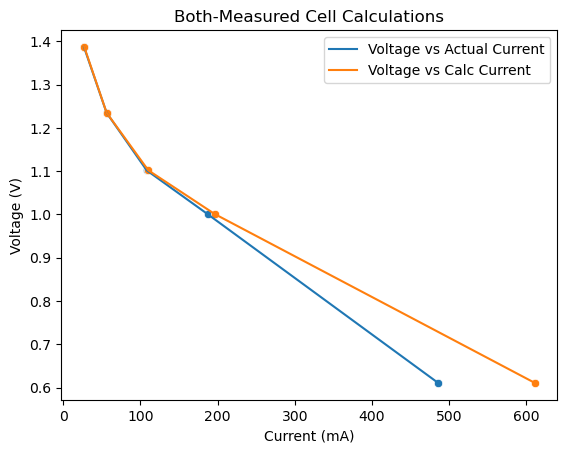

In [20]:
sns.lineplot(data=both_cell_2_21, x='Current (mA)', y='Voltage (V)', label='Voltage vs Actual Current')
sns.scatterplot(data=both_cell_2_21, x='Current (mA)', y='Voltage (V)')
sns.lineplot(data=both_cell_2_21, x='Calc Current (mA)', y='Voltage (V)', label='Voltage vs Calc Current')
sns.scatterplot(data=both_cell_2_21, x='Calc Current (mA)', y='Voltage (V)')
plt.title('Both-Measured Cell Calculations');

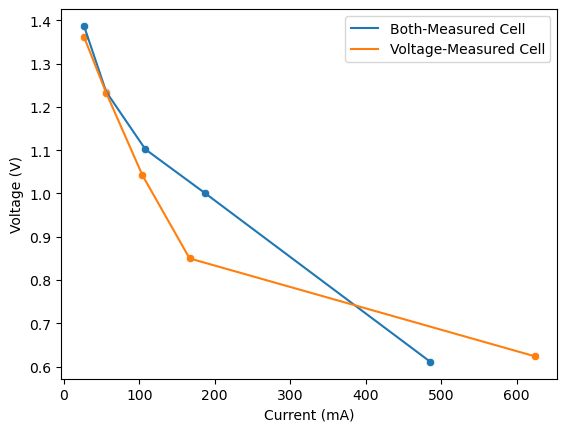

In [21]:
sns.lineplot(data=both_cell_2_21, x='Current (mA)', y='Voltage (V)', label='Both-Measured Cell')
sns.scatterplot(data=both_cell_2_21, x='Current (mA)', y='Voltage (V)')
sns.lineplot(data=voltage_only_cell_2_21, x='Current (mA)', y='Voltage (V)', label='Voltage-Measured Cell')
sns.scatterplot(data=voltage_only_cell_2_21, x='Current (mA)', y='Voltage (V)');

# Polarization Curves (Water Trials) - 03/06/2024

1 cell had 6 mL of water (usual amount), other had 8 mL
8 mL did voltage + current, 6 mL did only voltage

In [22]:
# test = pd.read_fwf('polcurves3:6.txt', delimiter='\t')
# test = test.iloc[2255:3689]
# test = test['Vernier Format 2'].str.split('\t', expand=True)
# test.reset_index(0,drop = True, inplace=True)
# test = test.rename(columns= {0:'time',1:'Voltage 1',2:'Current 1', 3:'Voltage 2'})
# for i in test.columns:
#     test[i] = pd.to_numeric(test[i])

In [23]:
# Run 3 voltage cell had a lot of bouncing, plotting here
#sns.lineplot(test,x='time',y='Voltage 2');

In [24]:
resistances_3_6 = [220,120,51,33,22,10,5.1]
runs_to_resistance_3_6 = dict(zip(np.array(['Run'+str(i) for i in np.arange(1,len(resistances_3_6)+1)]), resistances_3_6))
cell_8ml = pd.DataFrame(data={'Run':runs_to_resistance_3_6.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_3_6.values(),
                                       'Voltage (V)':[1.394,1.340,1.242, 1.194, 1.150,1.076,0.920],
                                       'Current (A)':[0.0062,0.0112,0.0243,0.0358,0.0520,0.1050,0.1692]})
cell_8ml['Current (mA)'] = cell_8ml['Current (A)'] * 1000
cell_8ml['Calc Current (mA)'] = cell_8ml['Voltage (V)'] / cell_8ml['Resistance (Ohms)'] * 1000
cell_8ml['Calc Voltage (V)'] = cell_8ml['Current (A)'] * cell_8ml['Resistance (Ohms)']
cell_6ml = pd.DataFrame(data={'Run':runs_to_resistance_3_6.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_3_6.values(),
                                       'Voltage (V)':[1.450,1.440,1.322,1.238,1.165,1.081,0.909]})
cell_6ml['Current (A)'] = cell_6ml['Voltage (V)'] / cell_6ml['Resistance (Ohms)']
cell_6ml['Current (mA)'] = cell_6ml['Current (A)'] * 1000

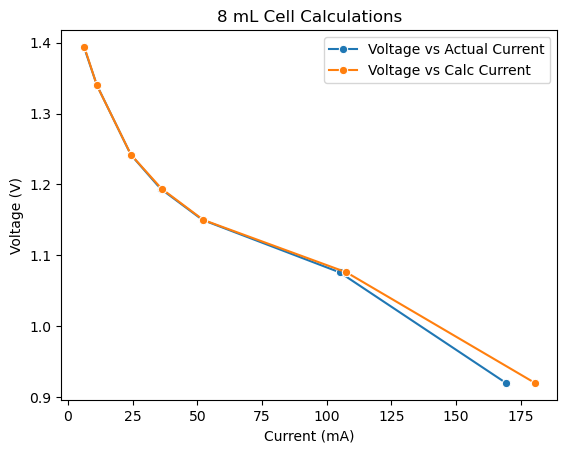

In [25]:
sns.lineplot(data=cell_8ml, x='Current (mA)', y='Voltage (V)', label='Voltage vs Actual Current',marker='o')
sns.lineplot(data=cell_8ml, x='Calc Current (mA)', y='Voltage (V)', label='Voltage vs Calc Current',marker='o')
plt.title('8 mL Cell Calculations');

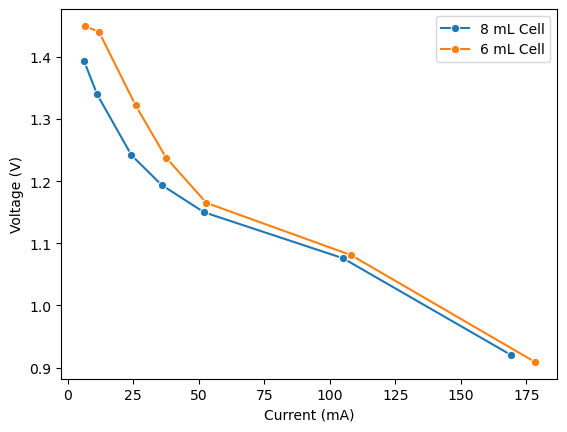

In [26]:
sns.lineplot(data=cell_8ml, x='Current (mA)', y='Voltage (V)', label='8 mL Cell',marker='o')
sns.lineplot(data=cell_6ml, x='Current (mA)', y='Voltage (V)', label='6 mL Cell',marker='o');

# Overall Polarization Curve Results

##### Plotting 2/7, 2/14, 2/21, Both-Measured Cell (Voltage vs Actual Current)
##### Plotting 3/6 8mL and 6mL curves

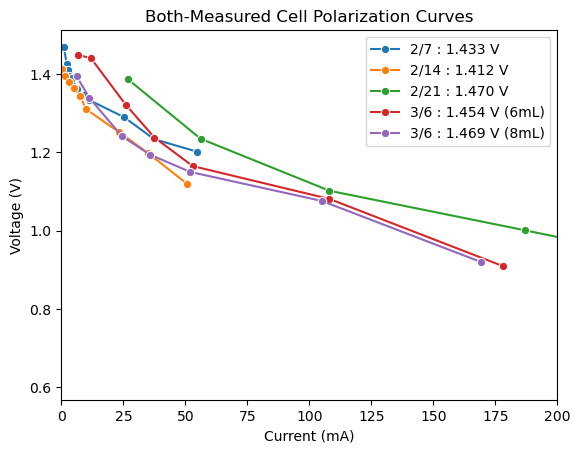

In [27]:
sns.lineplot(voltage_cell_2_17, x='Current (mA)',y='Voltage (V)', label = '2/7 : 1.433 V', marker='o')
sns.lineplot(both_cell_2_14, x='Current (mA)',y='Voltage (V)', label ='2/14 : 1.412 V', marker = 'o')
sns.lineplot(both_cell_2_21, x='Current (mA)',y='Voltage (V)', label = '2/21 : 1.470 V', marker = 'o')
sns.lineplot(cell_6ml, x='Current (mA)',y='Voltage (V)', label = '3/6 : 1.454 V (6mL)', marker = 'o')
sns.lineplot(cell_8ml, x='Current (mA)',y='Voltage (V)', label = '3/6 : 1.469 V (8mL)', marker = 'o')
plt.xlim(0,200)
plt.title('Both-Measured Cell Polarization Curves');

(0.0, 200.0)

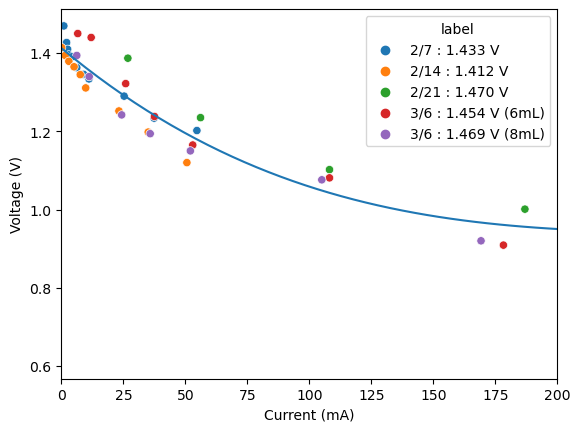

In [40]:
voltage_cell_2_17['label'] = '2/7 : 1.433 V'
both_cell_2_14['label'] = '2/14 : 1.412 V'
both_cell_2_21['label'] = '2/21 : 1.470 V'
cell_6ml['label'] = '3/6 : 1.454 V (6mL)'
cell_8ml['label'] = '3/6 : 1.469 V (8mL)'

combined_data = pd.concat([voltage_cell_2_17, both_cell_2_14, both_cell_2_21, cell_6ml, cell_8ml])

sns.scatterplot(data=combined_data, x='Current (mA)', y='Voltage (V)', hue='label', marker='o')

coefficients = np.polyfit(combined_data['Current (mA)'], combined_data['Voltage (V)'], 3)

function = np.poly1d(coefficients)

line = np.linspace(combined_data['Current (mA)'].min(), combined_data['Current (mA)'].max(), 100)

plt.plot(line, function(line))
plt.xlim(0,200)

In [34]:
combined_data


,Run,Resistance (Ohms),Voltage (V),Current (Amps),Current (mA),label,Current (A),Calc Current (mA),Calc Voltage (V)
0,Run1,1500.0,1.469500,0.000980,0.979667,2/7 : 1.433 V,NaN,NaN,NaN
1,Run2,680.0,1.427000,0.002099,2.098529,2/7 : 1.433 V,NaN,NaN,NaN
2,Run3,560.0,1.409750,0.002517,2.517411,2/7 : 1.433 V,NaN,NaN,NaN
3,Run4,470.0,1.395500,0.002969,2.969149,2/7 : 1.433 V,NaN,NaN,NaN
4,Run5,330.0,1.390500,0.004214,4.213636,2/7 : 1.433 V,NaN,NaN,NaN
5,Run6,220.0,1.362800,0.006195,6.194545,2/7 : 1.433 V,NaN,NaN,NaN
6,Run7,150.0,1.345667,0.008971,8.971111,2/7 : 1.433 V,NaN,NaN,NaN
7,Run8,120.0,1.334000,0.011117,11.116667,2/7 : 1.433 V,NaN,NaN,NaN
8,Run9,51.0,1.290000,0.025294,25.294118,2/7 : 1.433 V,NaN,NaN,NaN
9,Run10,33.0,1.233750,0.037386,37.386364,2/7 : 1.433 V,NaN,NaN,NaN
